# Pulsar Star Classifier

**Data source**: [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/HTRU2)

**Original work**:

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, *Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach*, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: [10.1093/mnras/stw656](https://arxiv.org/abs/1603.05166) 


**Attribute Information**

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class (binary; 0 for not a pulsar star, 1 for pulsar star)

**Acronyms**:
* DM-SNR : Dispersion Measure Signal-to-Noise Ratio

HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) # Show non-truncated dataframe
pd.set_option('display.max_rows', 500)
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style({'legend.frameon':True})

%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exploratory analysis

In [2]:
df = pd.read_csv('pulsar_stars.csv',sep=',')
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [3]:
df.isnull().values.any()

False

In [4]:
list(df.columns)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

**Observation**: The data is complete (i.e., no missing data). Also, the feature names are rather long and should be renamed for convenient purposes. Notice there is a space at the beginning of each feature name.

In [5]:
df.rename(columns={
    " Mean of the integrated profile":"mean_int",
    " Standard deviation of the integrated profile":"std_int",
    " Excess kurtosis of the integrated profile":"kurtosis_int",
    " Skewness of the integrated profile":"skewness_int", 
    " Mean of the DM-SNR curve":"mean_dmsnr",
    " Standard deviation of the DM-SNR curve":"std_dmsnr",
    " Excess kurtosis of the DM-SNR curve":"kurtosis_dmsnr",
    " Skewness of the DM-SNR curve":"skewness_dmsnr"
     },inplace = True)

In [6]:
df.dtypes

mean_int          float64
std_int           float64
kurtosis_int      float64
skewness_int      float64
mean_dmsnr        float64
std_dmsnr         float64
kurtosis_dmsnr    float64
skewness_dmsnr    float64
target_class      int64  
dtype: object

In [7]:
df.describe()

,mean_int,std_int,kurtosis_int,skewness_int,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


### Feature visualization

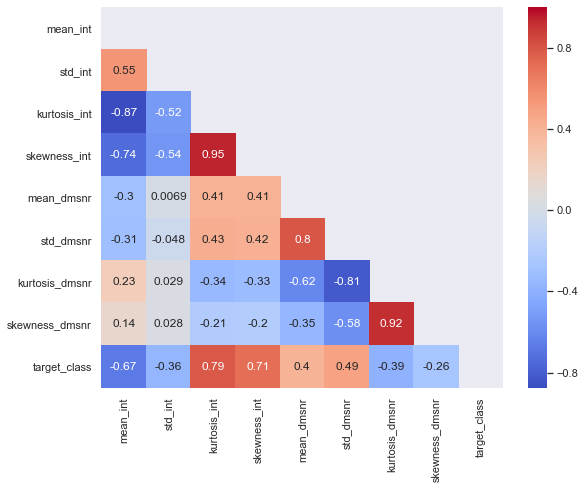

In [8]:
# Correlation matrix
sns.set(font_scale=1.)
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)   #No need to see both halfs of the correlation matrix
mask[np.triu_indices_from(mask)] = True 

plt.figure(figsize(9,7))
ax = sns.heatmap(corr,mask = mask, annot=True, cmap = "coolwarm") 

**Observation**: From the correlation matrix, most of the input features has a sizeable correlation with the target class. It appears that Excess kurtosis of the integrated profile has the highest correlation value. This is one indication that this feature may be the most important one.

With many features in the data set, it is important to see how well they can be separated by the output classes. Conveniently, seaborn has a great pairplot() function that can do this with ease.

C:\Users\Anthony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


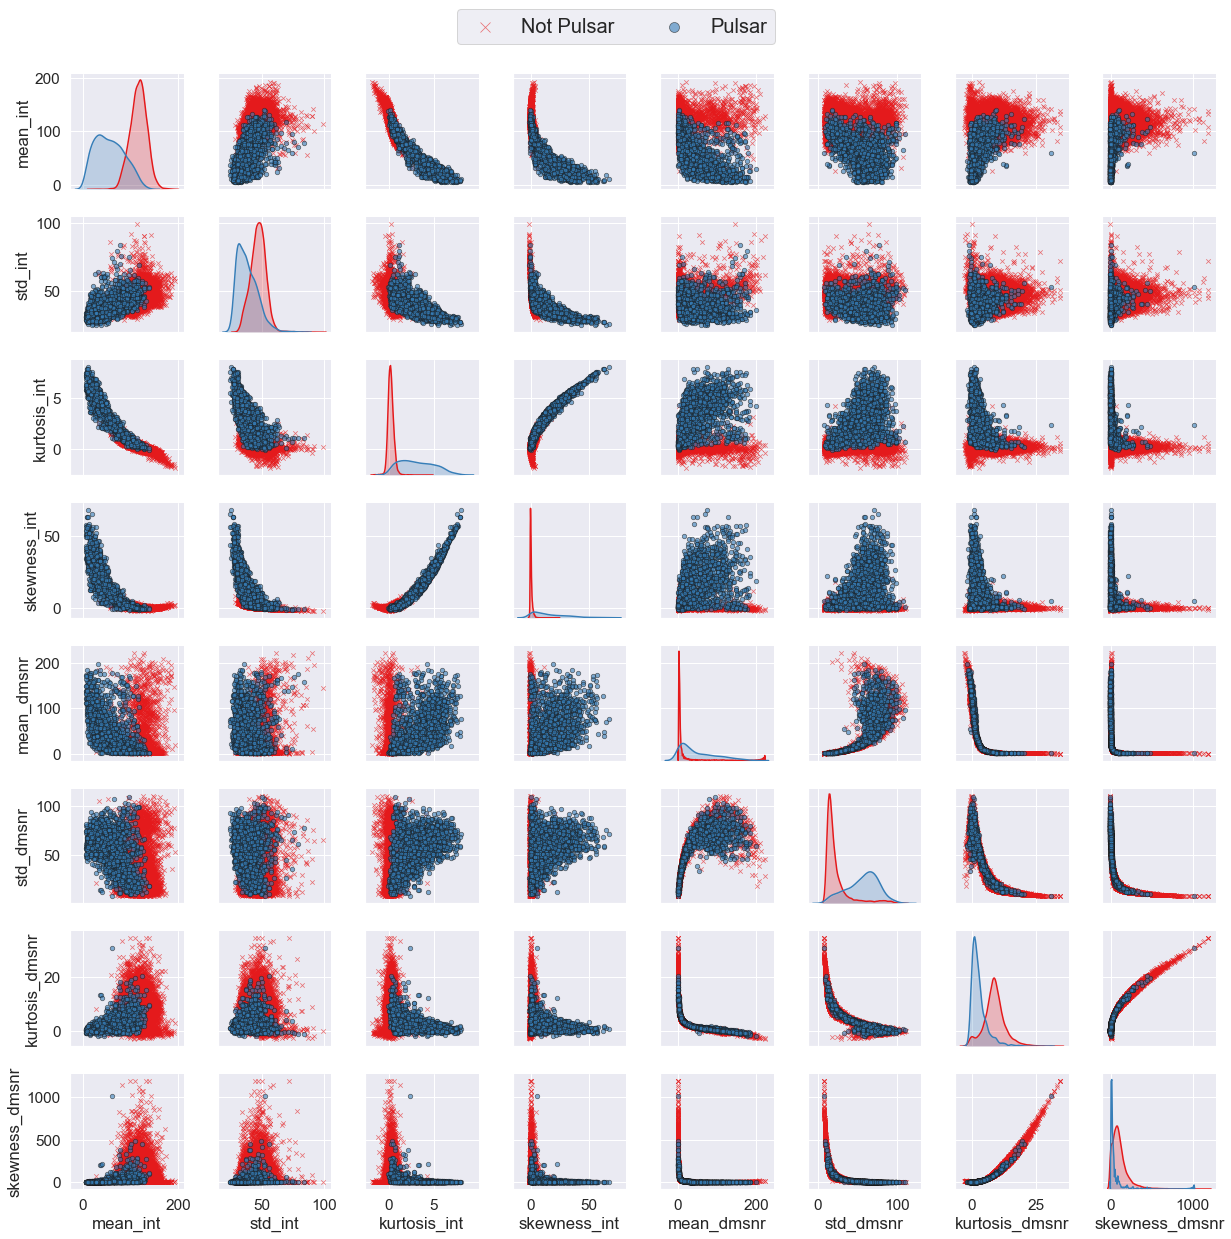

In [9]:
# Pairwise feature plot
sns.set(font_scale=1.4)
g = sns.pairplot(df, vars = df.columns[:-1], 
                 hue='target_class',
                 markers = ['x','o'],
                 palette = 'Set1',
                 plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},
                )
g._legend.remove()
handles = g._legend_data.values()
lgnd = g.fig.legend(handles=handles, labels=['Not Pulsar', 'Pulsar'], loc='upper center', ncol=3,fontsize=20)
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
g.fig.set_size_inches(18,18)
g.fig.subplots_adjust(top=0.94, bottom=0.08)
plt.show()

**Observation**: From the diagonal plots, one can see the varying separability of each feature. Features such as mean_int and std_dmsnr have decent separability while features such as std_int and skewness_dmsnr are somewhat poor. 

One can see that the kurtosis and the skewness and positively correlated, which is expected. 

One can also visualize the separability of each feature using a box plot as shown as follows.

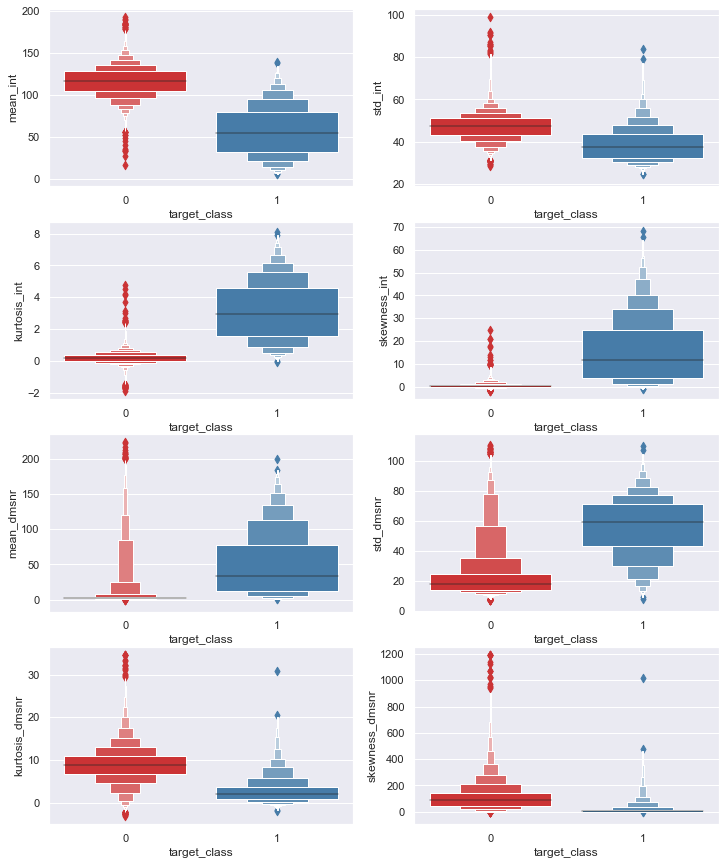

In [10]:
# Box plot
sns.set(font_scale=1)
feature_names = list(df.columns.values)[:-1]
fig, axes =plt.subplots(nrows=4,ncols=2, figsize=(12,15))
for i, t in enumerate(feature_names):
    sns.boxenplot(y = t,x='target_class', data=df, ax=axes.flatten()[i],palette = 'Set1')

## Data preprocessing

Since the input features are all of type float, the StandardScalar() method from sklearn is sufficient for the preprocessing.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [12]:
class_names = ['Not Pulsar', 'Pulsar']


X = df[feature_names].copy()
X = X.values
#X = scaler.fit_transform(X) #Normalize input values

y = df.target_class.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=43)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

At this point, the input and output values are used in GridSearchCV to determine best parameters of a classifier. Cross validation is involved in GridSearchCV.

## Classification

For this analysis, let us explore the use of sklearn GridSearchCV to determine parameters for different classifiers.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### A survey of estimators

Below is a python class that conveniently helps perform a grid search across different sklearn supervised models in a pipeline. Credit goes to [David S. Batista](https://github.com/davidsbatista/machine-learning-notebooks/blob/master/hyperparameter-across-models.ipynb) who adapted the original code by a fellow named Panagiotis Katsaroumpas.

In [16]:
class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [17]:
models = { 
     'GaussianNB': GaussianNB(),
     'kNN': KNeighborsClassifier(),
     'LogisticRegression': LogisticRegression(),
     'DecisionTreeClassifier': DecisionTreeClassifier(),
     'RandomForestClassifier': RandomForestClassifier(),
}

params = { 
     'GaussianNB':{},
     'kNN':
        {
           'n_neighbors': [5, 10, 20],
           'algorithm': ['ball_tree', 'kd_tree'],
           'leaf_size': [20, 30, 40],
        },
     'LogisticRegression': {'C':[1,5,10,15,18], 
                            'solver':['lbfgs','sag']},
     'DecisionTreeClassifier': 
        {
           'criterion': ['gini'],
           'max_depth': [5, 8, 12],
           'min_samples_split': [4, 8],
           'min_samples_leaf': [4, 8]
        },
    'RandomForestClassifier':
        {'criterion': ['gini'], 
         'bootstrap': [True],
         'n_estimators': [50, 100, 200],
         'max_depth': [5, 8, 12],
         'min_samples_split': [4, 8],
         'min_samples_leaf':[4, 8],
         'max_features': [2, 3]
        },
}

In [18]:
estimators = EstimatorSelectionHelper(models, params)
estimators.fit(X_train, y_train, n_jobs = 2, cv = 5, return_train_score=False)
estimators.score_summary()

Running GridSearchCV for GaussianNB.
Running GridSearchCV for kNN.
Running GridSearchCV for LogisticRegression.
Running GridSearchCV for DecisionTreeClassifier.
Running GridSearchCV for RandomForestClassifier.
Done.


,estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,RandomForestClassifier,3.527798,0.082108,0.058401,0.001744,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}",0.983240,0.980447,0.981644,0.981644,0.981629,0.981721,0.000889
1,RandomForestClassifier,1.895198,0.061689,0.035599,0.005274,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}",0.982442,0.980447,0.981245,0.982442,0.981629,0.981641,0.000757
2,RandomForestClassifier,1.297000,0.049643,0.030998,0.002279,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}",0.982841,0.980846,0.980447,0.982841,0.980831,0.981561,0.001055
3,RandomForestClassifier,0.768397,0.029782,0.014401,0.001498,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 50}",0.982442,0.981245,0.980447,0.980846,0.982428,0.981481,0.000818
4,RandomForestClassifier,1.848998,0.124715,0.030200,0.003187,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}",0.983240,0.981245,0.980048,0.982442,0.980431,0.981481,0.001203
5,RandomForestClassifier,3.572999,0.101353,0.057001,0.001263,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}",0.982841,0.980048,0.982043,0.982043,0.980431,0.981481,0.001062
6,RandomForestClassifier,0.860798,0.031874,0.014800,0.001168,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 50}",0.982841,0.982442,0.980846,0.980846,0.980431,0.981481,0.000968
7,RandomForestClassifier,2.161597,0.035265,0.054601,0.002416,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}",0.982442,0.981245,0.980048,0.982841,0.980831,0.981481,0.001030
8,RandomForestClassifier,0.762398,0.019168,0.013401,0.000490,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}",0.982442,0.979649,0.981245,0.981644,0.982029,0.981402,0.000962
9,RandomForestClassifier,1.826197,0.048653,0.031801,0.002040,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}",0.982442,0.980048,0.981644,0.981644,0.981230,0.981402,0.000783


**Observation**: All classifiers that were considered showed impressive test scores. They all showed a mean test score of about 0.98 with the exception of Naive Bayes which was scored with a value of 0.94 (but this is still considered impressive). This survey also showed that these models are not sensitive to changes in the hyperparameters. These high test scores shown from this survey is greatly attritbuted to the great feature selection that was done in the original work by Lyon *et al.*

Consider delving further at the model with the highest mean test score - Random Forest Classifier. Note that the original work by Lyon *et al.* found that their use of the Gaussian Hellinger Very Fast Decision Tree also resulted with an accuracy of about 0.98 with this data set. Interestingly, Lyon *et al.* also obtainined an accuracy of 0.94 on their Naive Bayes classifier. 

In [19]:
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth = 8,
                             max_features = 3,
                             min_samples_leaf = 4,
                             min_samples_split = 8,
                             criterion = 'gini',
                             bootstrap = True
                            )

### ROC analysis

Here, the diagnostic performance of the classifier is examined.

In [20]:
from sklearn.model_selection import StratifiedKFold

In [21]:
def roc_analysis(X, y, clf, cv):
    """
       Classification and ROC analysis
       Code adapted from: scikit-learn ROC with 
                          cross validation example
       
       Input:
          X: Input_features
          y: output class
          clf: sklearn classifier/estimator
          cv: sklearn cross-validator
       Output:
          ROC analysis curve
    """

    # Run classifier with cross-validation and plot ROC curves
    tprs = []
    aucs = [] 
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(9,7))
    plt.rc('font', size=16)
    i = 0
    for train, test in cv.split(X, y):
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1.5, alpha=0.7,
                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                 label='Random guess', alpha=1)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='k',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=1)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3,
                     label=r'$\pm$ 1 std. dev.')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver operating characteristic', fontsize=15)
    plt.legend(loc="lower right", frameon=True, framealpha=1, facecolor='w')
    plt.show()

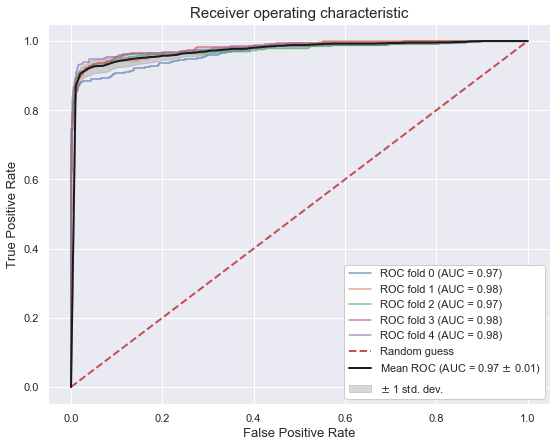

In [22]:
cv = StratifiedKFold(n_splits=5, random_state=43)
roc_analysis(X, y, clf, cv)

**Observation**: The mean ROC curve closely reaches the top-left corner on the plot, which indicates that the performance of the random forest classifier is very good. This is quantified from the area under the curve (AUC) of a value very close to 1. For the most part, the ROC curve of each fold is mostly within 1 standard deviation from the mean ROC curve.

### Confusion matrix

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


 CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

  Not Pulsar       0.98      0.99      0.99      4855
      Pulsar       0.92      0.81      0.86       515

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.90      0.93      5370
weighted avg       0.97      0.98      0.97      5370



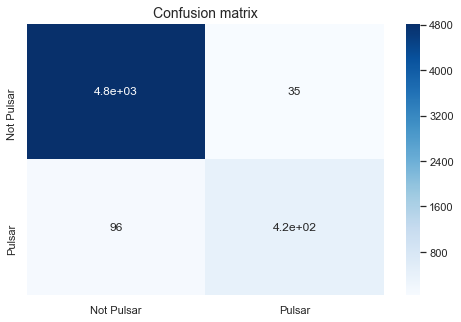

In [24]:
y_predict = clf.predict(X_test)
print('\n CLASSIFICATION REPORT: \n', classification_report(y_test, y_predict, target_names=class_names), sep='') 

# Confusion matrix
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
cm = confusion_matrix(y_test, y_predict)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, cmap='Blues', annot = True, 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix', fontsize=14)
plt.show()

**Observation**: From the confusion matrix, the random forest classifier does very well in classifying the input features as not a pulsar star. Although the score for a positive classification is somewhat lower, it is considered a good score. Perhaps more positive examples in the data set may improve the model's performance. 

### Feature Importance

Feature ranking:
1. feature 2 (0.413522)
2. feature 3 (0.289199)
3. feature 0 (0.166572)
4. feature 4 (0.043685)
5. feature 5 (0.028040)
6. feature 6 (0.025977)
7. feature 1 (0.017787)
8. feature 7 (0.015218)


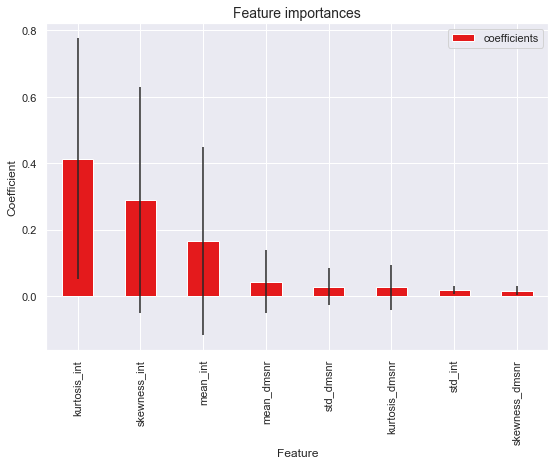

In [25]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create dataframe
df_importances = pd.DataFrame(importances, df.columns[:-1]).reset_index()
std = np.std([feat.feature_importances_ for feat in clf.estimators_], axis = 0)
df_importances['std'] = std
df_importances = df_importances.rename(columns={"index": "features", 0:"coefficients"})
df_importances = df_importances.sort_values(by = 'coefficients', ascending = False)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
df_importances.plot.bar(x='features', y='coefficients', 
                        yerr='std', colormap='Set1',
                        figsize=(9,6)
                       )
plt.title('Feature importances',fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

**Observation**: From the feature importances analysis, kurtosis_int ranks first while kurtosis_dmsnr ranks last for this random forest classifier. The ranking of these features appear consistent with the order of the magnitude of the correlation coefficients that was computed earlier. However, the large variability from this estimator is noted.

## Additional analysis: Generalized Additive Models

In [26]:
from pygam import LogisticGAM

In [27]:
gam = LogisticGAM().fit(X_train, y_train)
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     45.8265
Link Function:                        LogitLink Log Likelihood:                                  -746.3009
Number of Samples:                        12528 AIC:                                             1584.2547
                                                AICc:                                            1584.6136
                                                UBRE:                                               2.1294
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8027
Feature Function                  Lam

__main__:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [28]:
gam.accuracy(X_test, y_test)

0.9763500931098696

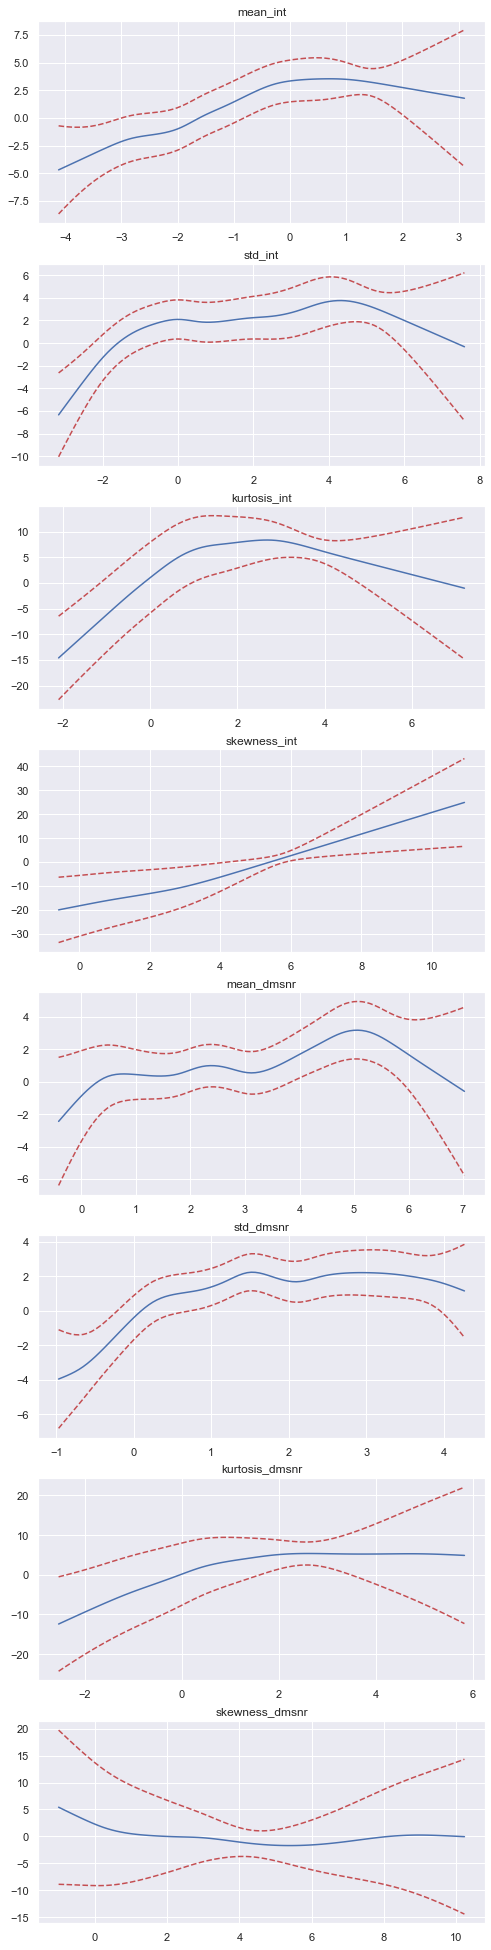

In [29]:
plt.rcParams['figure.figsize'] = (8, 35)
fig, axs = plt.subplots(len(feature_names),1)
titles = feature_names
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term = i, X=XX, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
plt.show()

**Observation**: The features with the largest variation in the profile are kurtosis_int, skewness_int, and mean_int. This is consistent with the ranking of the features shown above.

## Additional analysis: Neural networks

For comparison, let us use a neural network to classify this data set. In principle, a neural network should obtain very similar accuracy as the other classifiers that were considered above. 

In [30]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [31]:
n_feat = len(feature_names)

In [32]:
def plot_keras_metrics(hist):
    '''Given the history of the Keras training model,
       plot the loss and accuracy.
    '''
    train_acc = hist.history['acc']
    train_loss = hist.history['loss']

    val_acc = hist.history['val_acc']
    val_loss = hist.history['val_loss']
    
    figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(train_loss, label='Training')
    plt.plot(val_loss, '--', label='Validation')
    plt.ylabel('Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.subplot(212)
    plt.plot(train_acc)
    plt.plot(val_acc, '--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

In [33]:
def create_keras_model():
    model = Sequential()
    model.add(Dense(n_feat, input_dim = n_feat, activation = 'relu') )
    # Hidden layer 1
    model.add(Dense(4, activation = 'relu'))
    # Output layer with a binary classification (positive or negative detection)
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    
    print(model.summary())
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [34]:
estimator = create_keras_model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
hist = estimator.fit(x = X_train, y = y_train, validation_split = 0.2, epochs = 20, verbose = 0 )

Instructions for updating:
Use tf.cast instead.


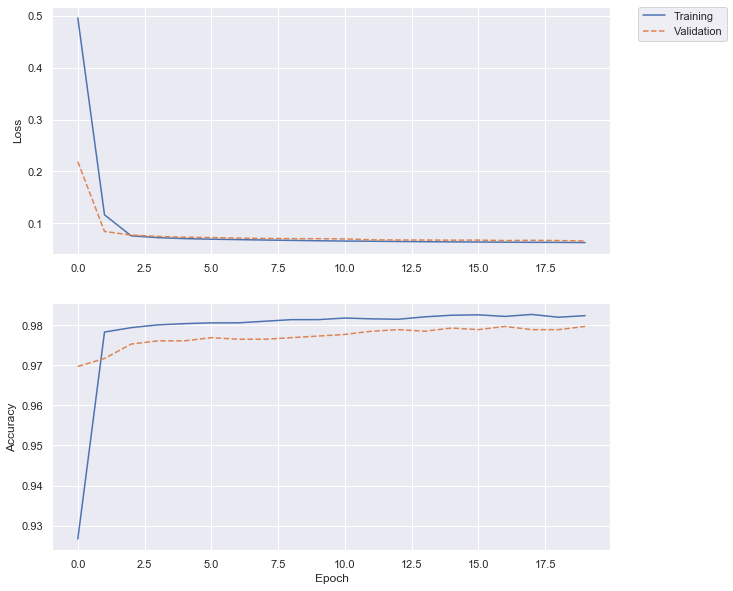

In [36]:
plot_keras_metrics(hist)

**Observation**: 

* Both the training and validation loss decreases at each epoch - no signs of major overfitting of the neural network. 
* Both the training and validation accuracy increases for the first few seconds and then saturates for the rest of the training. At the final epoch, the accuracy score of the model was recorded to be at around 0.98, which is virtually the same as the random forest classifier that was explored above.